# Day 04 — Integrals as Areas and More


**Learning Goal**: Connect definite integrals with antiderivatives and accumulation functions.

**Seasonal Hook**: Counting wrapped gifts piled under the tree as area under a "present density" curve.


### Story Spark
- **Intro**: Gifts pile beneath the tree following a mysterious density curve; Mrs. Claus tracks the area to predict surprise inventory.
- **Gossip**: Rumor says a mischievous elf once hid a skateboard, causing the accumulation graph to spike and triggering a midnight audit.
- **Narration Tips**: Present numerical vs. symbolic runs as dueling gift counters, then spotlight the slider that shows how totals blossom as the upper limit sweeps forward.

### Experiment Game Plan
- **Outline**: Use numerical integration (`scipy.integrate.quad`) vs. symbolic antiderivatives to show equivalence.
- **Diagram Goal**: Filled area plot plus accumulation function graph showing increasing total gifts.

### References & Resources
- [Essence of Calculus Chapter 7 (YouTube)](https://www.3blue1brown.com/topics/calculus)
- [MIT OCW notes on FTC](https://ocw.mit.edu/)
- [Brilliant "Fundamental Theorem" course.](https://brilliant.org/)
- Story cues: Essence of Calculus delivers the emotional hook, MIT OCW anchors rigor, Brilliant’s module adds exercises.

### Shared Imports

In [1]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

try:
    import ipywidgets as widgets
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as exc:
    widgets = None
    def interact(*args, **kwargs):
        print('ipywidgets unavailable; adjust parameters manually instead.')
    print('ipywidgets could not be loaded:', exc)

### Guided Experiments & Visuals
The following cell builds the math exploration plus the requested diagram.

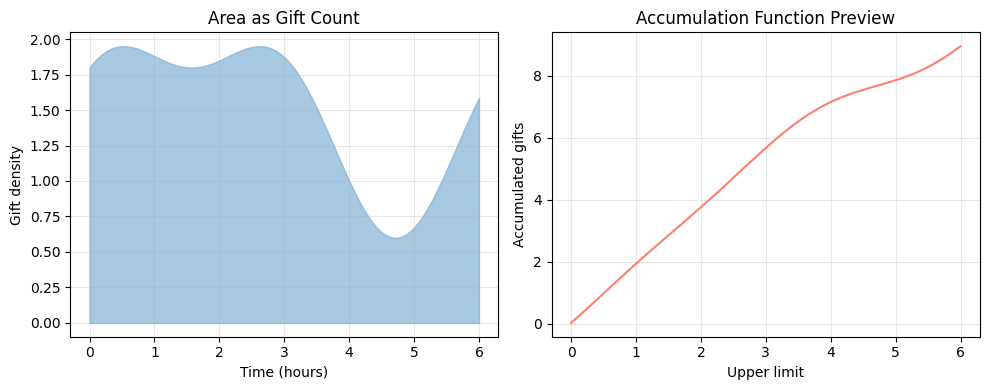

interactive(children=(FloatSlider(value=3.0, description='upper', max=6.0, min=0.5, step=0.25), Output()), _do…

In [2]:

import numpy as np
try:
    from scipy import integrate
except Exception as exc:
    integrate = None
    print('SciPy unavailable; falling back to numpy.trapz approximation.', exc)


def present_density(t):
    return 0.6 * np.sin(t) + 1.5 + 0.3 * np.cos(2 * t)


x_vals = np.linspace(0, 6.0, 500)
y_vals = present_density(x_vals)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.fill_between(x_vals, 0, y_vals, color='#80b1d3', alpha=0.7)
plt.xlabel('Time (hours)')
plt.ylabel('Gift density')
plt.title('Area as Gift Count')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
accumulation = np.cumsum(y_vals) * (x_vals[1] - x_vals[0])
plt.plot(x_vals, accumulation, color='#fb8072')
plt.xlabel('Upper limit')
plt.ylabel('Accumulated gifts')
plt.title('Accumulation Function Preview')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


def accumulation_counter(upper=3.0):
    mask = x_vals <= upper
    area = np.trapz(y_vals[mask], x_vals[mask])
    precise = None
    if integrate:
        precise, _ = integrate.quad(present_density, 0, upper)
    print(f'Upper limit {upper:.2f} gives ~{area:.2f} presents (trapz).')
    if precise is not None:
        print(f'quad agrees with {precise:.2f} presents.')


if widgets:
    interact(accumulation_counter, upper=(0.5, 6.0, 0.25))
else:
    accumulation_counter(3.0)


### Final Hands-on Challenge
Build an interactive slider (via `ipywidgets`) to vary the upper limit of integration and display the accumulating present count. "Guide learners to sweep the FTC slider, screenshot their favorite accumulation story, and explain how area became presents."

In [3]:

# 📌 Final Hands-on Task
# Build an interactive slider (via `ipywidgets`) to vary the upper limit of integration and display the accumulating present count. "Guide learners to sweep the FTC slider, screenshot their favorite accumulation story, and explain how area became presents."

# Use the cells above as inspiration, then document your reasoning below.
# Feel free to add markdown, code, or even upload supporting images.
